<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 24-2-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Σάββατο, 11-3-2023, 23:59:59
<h1><center>Άσκηση 1</center></h1>

Σε κάθε άσκηση Python, εισάγουμε πρώτα τις βιβλιοθήκες που θα χρησιμοποιήσουμε: εδώ, θα χρειαστούμε τις `numpy` και `matplotlib`. 
Επιλέξτε το παρακάτω κελί κώδικα και πατήστε Shift + Enter, ώστε να το εκτελέσετε. Το ίδιο θα κάνετε με οποιοδήποτε κελί κώδικα. Αν τροποποιήσετε κάποιο κελί κώδικα, θα πρέπει να το ξανατρέξετε για να δείτε τα αποτελέσματά του.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Οι διαφορικές εξισώσεις περιγράφουν πραγματικά πολλά φυσικά φαινόμενα ή μηχανικές κατασκευές στον πραγματικό κόσμο. Όμως, για να προσομοιώσουμε διαφορικές εξισώσεις στον υπολογιστή μας (και να προβλέψουμε πράγματα πριν τα υλοποιήσουμε στην πραγματικότητα), πρέπει να τις "διακριτοποιήσουμε": δεν μπορούμε να αποθηκεύσουμε στον υπολογιστή μας τη συνεχή μεταβλητή $t$ και τις τιμές των συναρτήσεων που εμπλέκονται στη διαφορική εξίσωση. Πρέπει λοιπόν να επιλέξουμε κάποιες τιμές για τη μεταβλητή $t$, όπως κάναμε στις γραφικές παραστάσεις της προηγούμενης σειράς ασκήσεων. Φυσικά, η Python έχει έτοιμες συναρτήσεις που λύνουν πολύπλοκες διαφορικές εξισώσεις αλλά δε θα μας απασχολήσουν σε αυτήν την άσκηση. Θα ακολουθήσουμε μια πιο απλή και ελέγξιμη προσέγγιση.

Έστω η διαφορική εξίσωση

 $$ \frac{d}{dt}y(t) + 4y(t) = 4x(t) $$

με $y(0^-)=0$, που περιγράφει (π.χ.) ένα κύκλωμα RC. Έχοντας μηδενικές αρχικές συνθήκες, το σύστημά μας είναι ΓΧΑ και η έξοδός του εξαρτάται μόνο από την είσοδο. Μια απλή μέθοδος διακριτοποίησης της διαφορικής εξίσωσης είναι η μέθοδος του Euler (πάλι αυτός!). Σκεφτείτε ότι η παράγωγος μιας συνάρτησης $x(t)$ δεν είναι κάτι περισσότερο από το λόχο $\Delta x/ \Delta t \rightarrow 0$. Μπορούμε λοιπόν να γράψουμε ότι

\begin{align}
    \frac{d}{dt}y(t) + 4y(t) &= 4x(t) \\
    \lim_{\Delta t \rightarrow 0} \frac{\Delta y}{\Delta t} + 4y(t) &= 4x(t) \\
    \lim_{h \rightarrow 0}  \frac{y(t+h) - y(t)}{h} + 4y(t) &= 4x(t)
\end{align}

Παρατηρήστε ότι το $h$ είναι η χρονική διαφορά μεταξύ δύο στιγμών που λαμβάνουμε τιμές για τη συνάρτηση $y(t)$. Μπορούμε να θέσουμε λοιπόν ως $h=T_s$ (και $t=nT_s, \ n \in \mathbb{N}$), με $T_s$ να είναι η *περίοδος δειγματοληψίας* στην προσπάθειά μας να διακριτοποιήσουμε τη διαφορική εξίσωση, δηλ. μια τιμή που καθορίζει κάθε πότε παίρνουμε τιμές από τις συναρτήσεις μας. Θέλουμε φυσικά αυτό το $T_s$ να είναι αρκετά μικρό - όσο μικρό επιθυμούμε. Έτσι γράφουμε

\begin{align}
     \frac{d}{dt}y(t) + 4y(t) =  4x(t) \\
    \lim_{h \rightarrow 0} \frac{y(t+h) - y(t)}{h} + 4y(t) = 4x(t) \\
    \lim_{T_s \rightarrow 0} \frac{y((n+1)T_s) - y(nT_s)}{T_s} + 4y(nT_s) =  4x(nT_s),
\end{align}

και αν θέλουμε να εκφράσουμε την εξίσωση κατ' ευθείαν στο διακριτό χρόνο, τότε

$$ y((n+1)T_s) = y(nT_s) - 4T_s y(nT_s) + 4T_s (nT_s) $$

Βρήκαμε λοιπόν μια σχέση που διακριτοποιεί τη διαφορική εξίσωση. Μπορούμε να γράψουμε κώδικα που για διάφορες τιμές του $T_s$ μας δίνει μια προσέγγιση της λύσης της διαφορικής εξίσωσης. Σας δίνεται ότι η θεωρητική λύση της διαφορικής εξίσωσης είναι

$$ y(t) = (1-e^{-4t})u(t) $$

<p> για είσοδο $x(t)=u(t)$, και ο παρακάτω κώδικας που πρέπει να συμπληρώσετε. Ο παρακάτω κώδικας εξετάζει πως συμπεριφέρεται η προσέγγισή μας σε σχέση με την τιμή της μεταβλητής $T_s$, ενώ υπολογίζει και το επί τοις εκατό σφάλμα μεταξύ της πραγματικής λύσεις και της προσέγγισής μας, σε κάθε χρονική στιγμή $nT_s$:

$$ \mathrm{Error}(nT_s) = \frac {y_\mathrm{true}(nT_s) -y_\mathrm{approx}(nT_s)} {y_\mathrm{true}(nT_s)} \times 100 $$
<p> Ακολουθεί ο κώδικας για $T_s = 0.1$ s.

In [ ]:
Ts = 0.1                                # Περίοδος δειγματοληψίας
t = np.arange(start=0, stop=2, step=Ts) # Διάνυσμα χρόνου t
x = np.ones(len(t))                     # Eίσοδος x(t) = u(t)

# Θεωρητική λύση διαφορικής εξίσωσης
y_theory = (1 - np.e ** (-4 * t)) * x

# Προσεγγιστική λύση
y = np.zeros(len(t))                      # Δέσμευση μνήμης

y[0] = 0                                  # Αρχικοποίηση
for n in range(0, len(y)-1):              # For loop για υλοποίηση εξόδου y(t) διαφορικής εξίσωσης
    y[n+1] =( y[n] ) - ( (4*Ts*y[n]) ) +( 4*Ts*(x[n]) )

Ας κάνουμε τα γραφήματα της θεωρητικής απάντησης με την προσέγγιση.

<ipython-input-13-a6e3b6dd375c>:13: RuntimeWarning: invalid value encountered in true_divide
  err_pct = ((y_theory - y) / y_theory) * 100


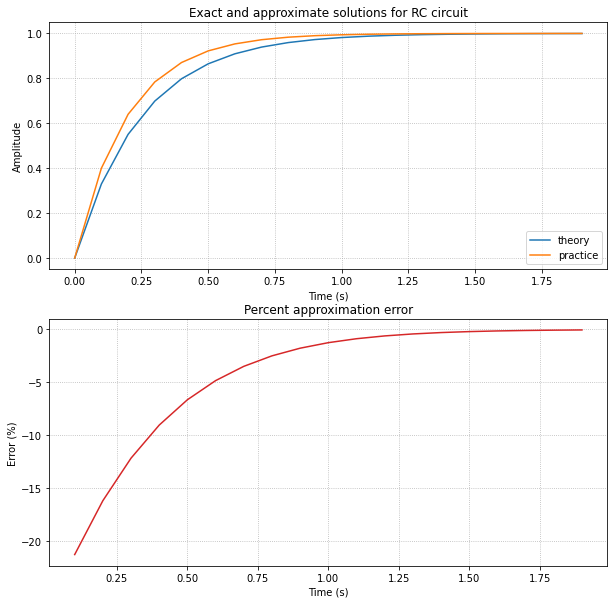

In [ ]:
# Γραφήματα
plt.figure(figsize = (10,10))
plt.subplot(2, 1, 1)
plt.plot(t, y_theory ,'-', label="theory")
plt.plot(t, y, '-', label="practice")
plt.grid(linestyle=':')
plt.title('Exact and approximate solutions for RC circuit')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')

# Υπολογισμός σφάλματος σε ποσοστό επί τοις εκατό
err_pct = ((y_theory - y) / y_theory) * 100

plt.subplot(2, 1, 2)
plt.plot(t[:len(t)], err_pct[:len(t)], color='tab:red')
plt.grid(linestyle=':')
plt.title('Percent approximation error')
plt.xlabel('Time (s)')
plt.ylabel('Error (%)')
plt.show()

Επαναλάβετε το παραπάνω για $T_s = 0.01$ s και τυπώστε τα αντίστοιχα γραφήματα. 

<ipython-input-16-5c2d4dcfa788>:30: RuntimeWarning: invalid value encountered in true_divide
  err_pct = ((y_theory - y) / y_theory) * 100


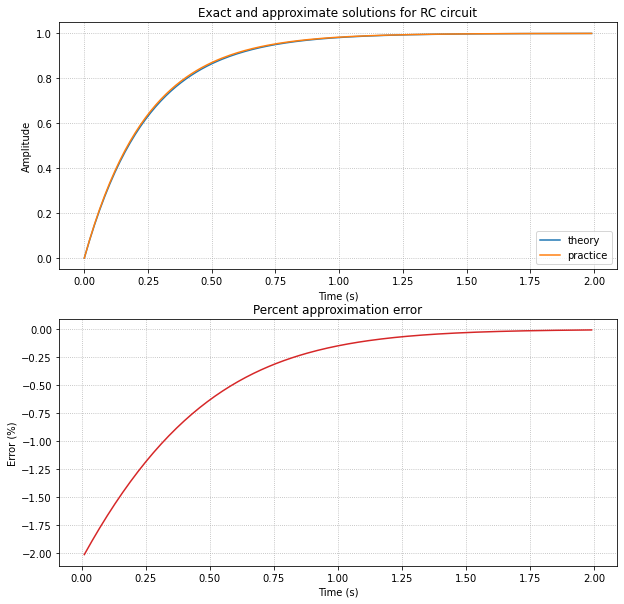

In [16]:
# INSERT CODE HERE
Ts = 0.01                               # Περίοδος δειγματοληψίας
t = np.arange(start=0, stop=2, step=Ts) # Διάνυσμα χρόνου t
x = np.ones(len(t))                     # Eίσοδος x(t) = u(t)

# Θεωρητική λύση διαφορικής εξίσωσης
y_theory = (1 - np.e ** (-4 * t)) * x

# Προσεγγιστική λύση
y = np.zeros(len(t))                      # Δέσμευση μνήμης

y[0] = 0                                  # Αρχικοποίηση
for n in range(0, len(y)-1):              # For loop για υλοποίηση εξόδου y(t) διαφορικής εξίσωσης
    y[n+1] =( y[n] ) - ( (4*Ts*y[n]) ) +( 4*Ts*(x[n]) )



# Γραφήματα
plt.figure(figsize = (10,10))
plt.subplot(2, 1, 1)
plt.plot(t, y_theory ,'-', label="theory")
plt.plot(t, y, '-', label="practice")
plt.grid(linestyle=':')
plt.title('Exact and approximate solutions for RC circuit')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')

# Υπολογισμός σφάλματος σε ποσοστό επί τοις εκατό
err_pct = ((y_theory - y) / y_theory) * 100

plt.subplot(2, 1, 2)
plt.plot(t[:len(t)], err_pct[:len(t)], color='tab:red')
plt.grid(linestyle=':')
plt.title('Percent approximation error')
plt.xlabel('Time (s)')
plt.ylabel('Error (%)')
plt.show()


# END OF CODE

Τι παρατηρείτε για την έξοδο όσον αφορά τις δυο διαφορετικές τιμές της παραμέτρου $T_s$? Γράψτε την απάντησή σας σε αυτό το κελί:

Παρατηρουμε οτι οσο ποιο μικρο ειναι το ts τοσο ποιο μικρη ειναι η αποκληση(το 
σφαλμα της θεωριτικης με την Προσεγγιστική εξοδο.

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.